# Analyzing a dataset and performing regression

## Import our libraries

In [179]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import display

In [180]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  LinearRegression, RidgeCV, Ridge, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

## Import data

In [181]:
df = pd.read_csv('sales_train.csv')
items = pd.read_csv('items.csv')
item_cats = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')

## Visualize data

In [182]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [183]:
df.describe(exclude = None)

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


Check if there are any missing values

In [184]:
df.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [185]:
df.shape

(2935849, 6)

Some data cleansing

In [186]:
df['date'] = pd.to_datetime(df.date, format = '%d.%m.%Y')

In [187]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [188]:
df1 = df.copy()
df1.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [189]:
df1['upload_month'] = df1.date.dt.month
del df1['date']
df1.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,upload_month
0,0,59,22154,999.00,1.0,1
1,0,25,2552,899.00,1.0,1
2,0,25,2552,899.00,-1.0,1
3,0,25,2554,1709.05,1.0,1
4,0,25,2555,1099.00,1.0,1


## Split data into train/test/val

Separate our independent and dependent variables
In this instance, we are looking to predict the 'item_cnt_day' variable, which is a variable that describes how many times an item was purchased in a day

In [190]:
X = df1.drop('item_cnt_day', axis = 1)
y = df1['item_cnt_day']
display(X.head())
display(y.head())

,date_block_num,shop_id,item_id,item_price,upload_month
0,0,59,22154,999.00,1
1,0,25,2552,899.00,1
2,0,25,2552,899.00,1
3,0,25,2554,1709.05,1
4,0,25,2555,1099.00,1


0    1.0
1    1.0
2   -1.0
3    1.0
4    1.0
Name: item_cnt_day, dtype: float64

In [191]:
modelFeatures = list(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.50, random_state = 1)
X_test, X_val, y_test, y_val = train_test_split(X,y,test_size = 0.50, random_state = 1)

In [204]:
modelFeatures
#this may come in handy later

['date_block_num', 'shop_id', 'item_id', 'item_price', 'upload_month']

In [206]:
#run a few algorithms and compare which performs better
reg_methods = [LinearRegression(),Ridge(), RidgeCV(), Lasso(), LassoCV(), RandomForestRegressor(random_state = 1)]
names_reg = ['Linear Regression', 'Ridge', 'RidgeCV', 'Lasso', 'LassoCV','Random Forest']

## Fitting our model(s)

In [194]:
def get_fits(reg_methods):
    fits = []
    for method in reg_methods:
        random.seed(1)
        reg = method
        reg.fit(X_train,y_train)
        fits.append(reg)
    return fits

fits = get_fits(reg_methods)

In [195]:
def get_scores(fits, names_reg, X_data, y_data):
    reg_reports = []
    for reg in fits:
        y_pred = reg.predict(X_data)
        mse = np.sqrt(mean_squared_error(y_data, y_pred))
        reg_reports.append(mse)
        
    index = names_reg
    scores = pd.DataFrame(reg_reports, index = index, columns = ['RMSE'])
    return scores
    
scores = get_scores(fits,names_reg, X_test, y_test)
scores

,RMSE
Linear Regression,2.217196
Ridge,2.217196
RidgeCV,2.217196
Lasso,2.217710
LassoCV,2.217710
Random Forest,1.406890


In [196]:
#Random forest performs best, lets tune the model

## Slight tuning (if we want)

In [197]:
rf_tuned = get_fits([RandomForestRegressor(n_estimators = 100, random_state = 1)])

In [198]:
rf_tuned_score = get_scores(rf_tuned, ['Random Forest'], X_val, y_val)

In [199]:
rf_tuned_score

,RMSE
Random Forest,2.763956


Now that our model is tuned and ready, lets see which features it considers important

This is how we determine which features creates the biggest impact in the prediction of our dependent variable (amount of times an item was purchased in a day)

This can lead us to uncover significant insights and drive future product and business decisions

In [200]:
rf_tuned = rf_tuned[0]

In [201]:
for name, importance in zip(modelFeatures, rf_tuned.feature_importances_):
    print(name, '=', importance)

date_block_num = 0.100059320408
shop_id = 0.255194124526
item_id = 0.145112317132
item_price = 0.425435407656
upload_month = 0.0741988302779


In [202]:
features = modelFeatures
importances = list(rf_tuned.feature_importances_)
indices = np.argsort(importances)
fi = pd.DataFrame(importances, index = features, columns = ['importances'])
fi.sort_values(by = 'importances', ascending = False, inplace = True)
fi
fi

,importances
item_price,0.425435
shop_id,0.255194
item_id,0.145112
date_block_num,0.100059
upload_month,0.074199


We can see that the 'item_price' and 'shop_id' features have a considerable impact on the item and its potential to be purchased

Lets visualize this through a bar chart

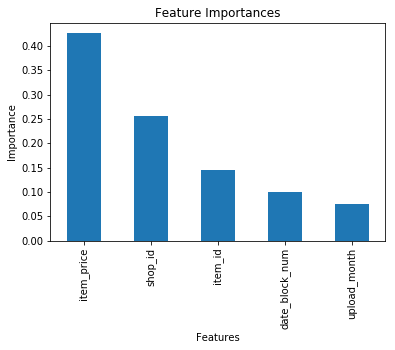

In [203]:
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
fi.importances.plot(kind = 'bar')

Not surprisingly, the item price impacts the potential of the item to be purchased

It seems logical that an items price would play a significant role - typically expensive items arent purchased in as much volume as cheaper items

Shop Id seems to also have a significant impact on the purchase outcome; it could be that some shops consume better business and should be capitalized on

## Insights

Some insights/further plan of action that could be derived from this analysis:
   - Determine which items specifically are being bought the most and which are not; analyze prices
   - Plan promotions for shops that have below average business
   - Perhaps it may be worth it to close down shops that have poor business
   - Determine if the items which are not being purchased are also located at the "above average" stores; if not it may make sense to introduce them in the "above average" stores
   